In [27]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
file_path = '/content/drive/My Drive/Model_DeploymentUTS/Dataset_B_hotel.csv'
df = pd.read_csv(file_path)

# Exploratory Data Analysis

In [30]:
# Membaca 5 data teratas
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Dataset B (Hotel)
- Booking_ID = Pengenal unik dari tiap pemesanan
- no_of_adults = Jumlah orang dewasa
- n o_of_children = Jumlah anak kecil
- no_of_weekend_nights = Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau memesan untuk menginap di hotel
- no_of_week_nights = Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau memesan untuk menginap di hotel
- type_of_meal_plan = Jenis paket makanan yang dipesan oleh pelanggan
- required_car_parking_space = Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1- Ya)
- room_type_reserved = Jenis kamar yang dipesan oleh pelanggan. Nilai-nilai tersebut dienkripsi oleh INN Hotels
- lead_time = Jumlah hari antara tanggal pemesanan dan tanggal kedatangan
- arrival_year = Tahun tanggal kedatangan
- arrival_month = Bulan tanggal kedatangan
- arrival_date = Tanggal kedatangan
- market_segment_type = Penunjukan segmen pasar
- repeated_guest = Apakah pelanggan tersebut merupakan tamu yang pernah melakukan booking dan juga menginap? (0 - Tidak, 1- Ya)
- no_of_previous_cancellations = Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini
- no_of_previous_bookings_not_canceled = Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini
- avg_price_per_room = Harga rata-rata per hari pemesanan; harga kamar bersifat dinamis. (dalam euro)
- no_of_special_requests = Jumlah total permintaan khusus yang dibuat oleh pelanggan (misalnya lantai yang tinggi, pemandangan dari kamar, dan lain-lain.)
- booking_status (target variable) = Flag yang menunjukkan apakah pemesanan dibatalkan atau tidak.

In [31]:
# melihat data type data set
df.dtypes

,0
Booking_ID,object
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,float64
room_type_reserved,object
lead_time,int64
arrival_year,int64


Berdasarkan dengan informasi dataset, maka ada beberapa kolom yang perlu disesuaikan data typenya:
- required_car_parking_space (float) -> int, karena kolom ini memiliki nilai (0/1)

In [32]:
# statistik dataset
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,35005.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,34643.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.031281,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.447208,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.174079,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.158417,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.275000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [33]:
# melihat missing value
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,907
required_car_parking_space,1270
room_type_reserved,0
lead_time,0
arrival_year,0


Terdapat 3 kolom yang memiliki missing value:
- type_of_meal_plan: 907 kolom
- required_car_parking_space: 1270 kolom
- avg_price_per_room: 1632 kolom

In [34]:
# melihat apakah dataset berduplikat
df.duplicated().sum()

np.int64(0)

Tidak ada duplikasi data dalam dataset ini

In [35]:
# cek unique value setiap kolom
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\n{col}")
    print(f"Jumlah nilai unik: {len(unique_vals)}")
    print(f"Nilai-nilainya: {unique_vals}")


Booking_ID
Jumlah nilai unik: 36275
Nilai-nilainya: ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']

no_of_adults
Jumlah nilai unik: 5
Nilai-nilainya: [2 1 3 0 4]

no_of_children
Jumlah nilai unik: 6
Nilai-nilainya: [ 0  2  1  3 10  9]

no_of_weekend_nights
Jumlah nilai unik: 8
Nilai-nilainya: [1 2 0 4 3 6 5 7]

no_of_week_nights
Jumlah nilai unik: 18
Nilai-nilainya: [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]

type_of_meal_plan
Jumlah nilai unik: 5
Nilai-nilainya: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' nan 'Meal Plan 3']

required_car_parking_space
Jumlah nilai unik: 3
Nilai-nilainya: [ 0. nan  1.]

room_type_reserved
Jumlah nilai unik: 7
Nilai-nilainya: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

lead_time
Jumlah nilai unik: 352
Nilai-nilainya: [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 1

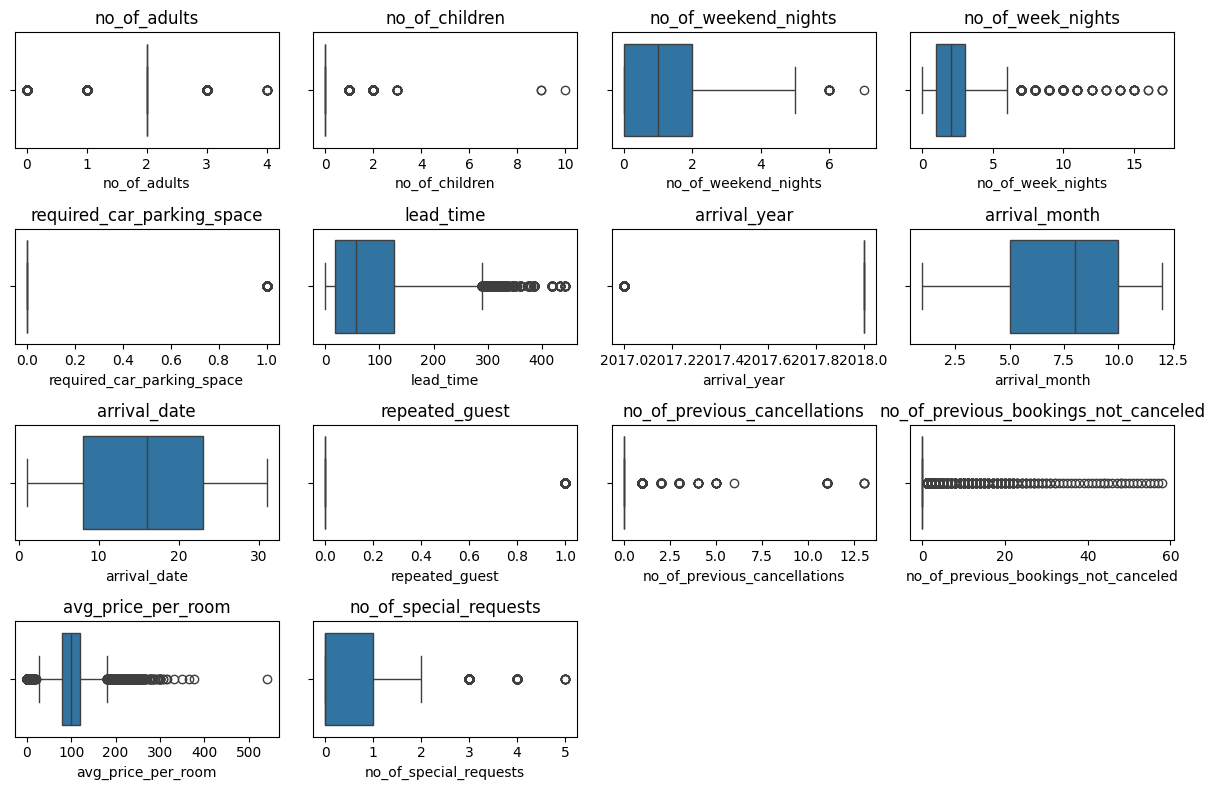

In [36]:
# Cek outlier
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
num_rows = (num_cols + 3) // 4

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

1. **Jumlah orang dewasa dan anak-anak (no_of_adults, no_of_children):** Sebagian besar data terkonsentrasi pada nilai rendah, dengan beberapa nilai yang lebih tinggi yang dapat dianggap sebagai outlier.
  
2. **Jumlah malam akhir pekan dan malam minggu (no_of_weekend_nights, no_of_week_nights):** Data tersebar cukup merata, meskipun ada beberapa nilai yang sangat jauh dari nilai utama, yang bisa dianggap sebagai outlier.

3. **Waktu pemesanan (lead_time):** Variabel ini memiliki distribusi yang lebih besar, dengan beberapa nilai yang jauh lebih tinggi dari rentang data utama, yang menunjukkan adanya outlier.

4. **Tahun dan bulan kedatangan (arrival_year, arrival_month):** Data kedatangan cenderung terpusat pada beberapa tahun dan bulan tertentu, dengan sedikit outlier.

5. **Tanggal kedatangan (arrival_date):** Sebaran data lebih merata, tanpa banyak outlier.

6. **Tamu berulang (repeated_guest):** Mayoritas data menunjukkan bahwa tamu bukan tamu berulang, dengan hanya sedikit tamu yang kembali lagi, yang dapat dianggap sebagai outlier.

7. **Pembatalan sebelumnya dan pemesanan yang tidak dibatalkan (no_of_previous_cancellations, no_of_previous_bookings_not_canceled):** Kedua variabel ini memiliki beberapa nilai yang jauh lebih tinggi dibandingkan data lainnya, menunjukkan adanya outlier pada jumlah pembatalan dan pemesanan yang tidak dibatalkan.

8. **Harga rata-rata per kamar (avg_price_per_room):** Terdapat rentang harga yang cukup lebar, dengan banyak nilai yang lebih tinggi dari harga rata-rata, yang bisa dianggap sebagai outlier.

9. **Permintaan khusus (no_of_special_requests):** Sebagian besar data menunjukkan nilai rendah (0 atau 1), dengan hanya sedikit tamu yang membuat lebih banyak permintaan khusus, yang dapat dianggap sebagai outlier.

In [37]:
# Frekuensi data kategorical
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())


Kolom: Booking_ID
Booking_ID
INN36275    1
INN00001    1
INN00002    1
INN36259    1
INN36258    1
           ..
INN00008    1
INN00007    1
INN00006    1
INN00005    1
INN00004    1
Name: count, Length: 36275, dtype: int64

Kolom: type_of_meal_plan
type_of_meal_plan
Meal Plan 1     27157
Not Selected     4986
Meal Plan 2      3220
Meal Plan 3         5
Name: count, dtype: int64

Kolom: room_type_reserved
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

Kolom: market_segment_type
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

Kolom: booking_status
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


1. **type_of_meal_plan:**
   - Sebagian besar tamu memilih **Meal Plan 1** (27,157 pemesanan), sementara **Meal Plan 2** (3,220 pemesanan) juga cukup banyak, namun **Meal Plan 3** sangat sedikit (hanya 5 pemesanan). Banyak tamu yang **tidak memilih paket makan** (4,986 pemesanan).

2. **room_type_reserved:**
   - **Room Type 1** paling banyak dipesan (28,130 pemesanan), diikuti oleh **Room Type 4** (6,057 pemesanan). Tipe kamar lainnya (Room Type 2, 5, 7, dan 3) memiliki jumlah pemesanan yang jauh lebih sedikit.

3. **market_segment_type:**
   - Sebagian besar pemesanan berasal dari segmen **Online** (23,214 pemesanan), diikuti oleh **Offline** (10,528 pemesanan). Segmen **Corporate**, **Complementary**, dan **Aviation** jauh lebih sedikit.

4. **booking_status:**
   - Lebih banyak pemesanan yang **tidak dibatalkan** (24,390 pemesanan), sedangkan pemesanan yang **dibatalkan** lebih sedikit (11,885 pemesanan).

Text(0.5, 1.0, 'Korelasi Antar Kolom Numerik')

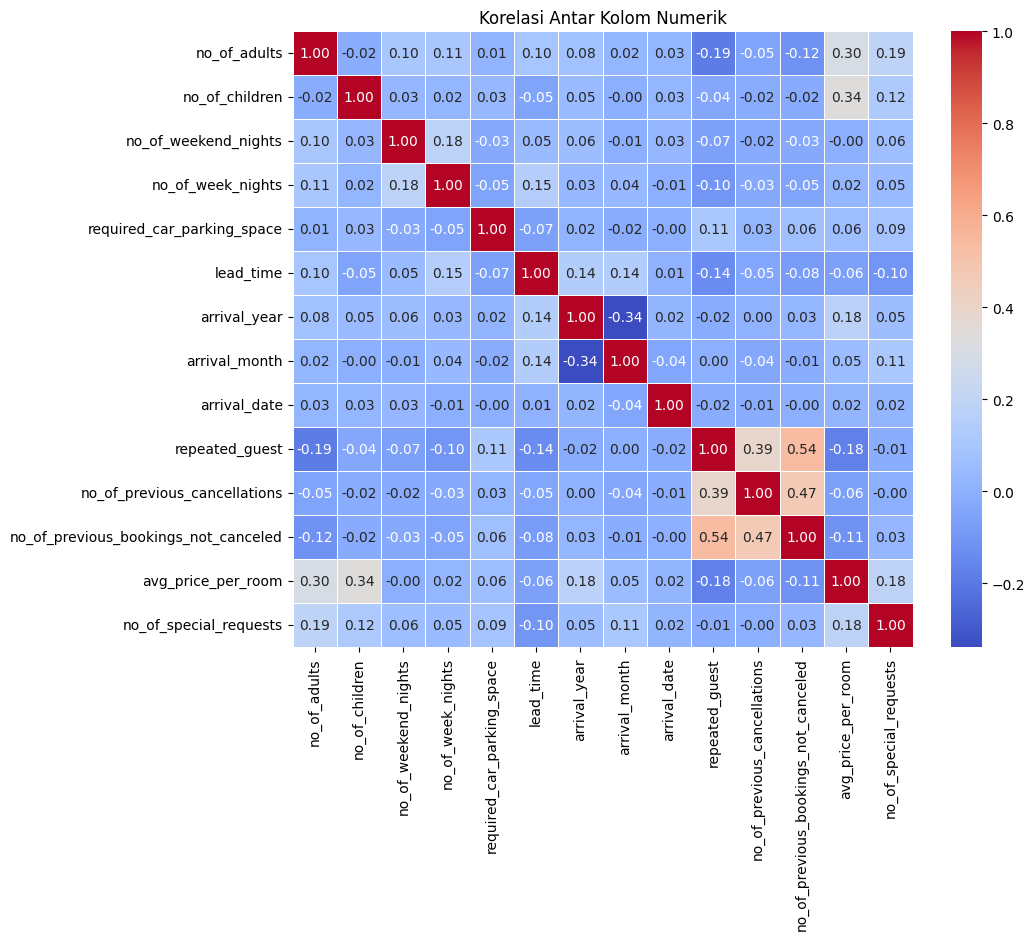

In [38]:
# Korelasi antar kolom numerik menggunakan heatmap
numeric_cols = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numeric_cols.append(col)

numeric_df = df[numeric_cols]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Kolom Numerik')

1. **Korelasi Positif Kuat**: Banyak **pemesanan yang tidak dibatalkan** berkorelasi dengan **tamu berulang** (0.54) dan harga kamar rata-rata cenderung lebih tinggi dengan lebih banyak **tamu dewasa** atau **anak-anak**.

2. **Korelasi Negatif**: **Tamu berulang** sedikit berkorelasi negatif dengan jumlah **tamu dewasa** (-0.19) dan **permintaan khusus** dengan harga kamar (-0.18).

3. **Korelasi Lemah atau Tidak Signifikan**: Variabel seperti **waktu pemesanan** dan **bulan kedatangan** memiliki korelasi sangat lemah dengan variabel lainnya.

Secara umum, beberapa faktor mempengaruhi pemesanan, tapi banyak variabel lainnya tidak saling terkait kuat.

<ipython-input-39-ce7a18d44efb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='booking_status', data=df, palette='Set2')


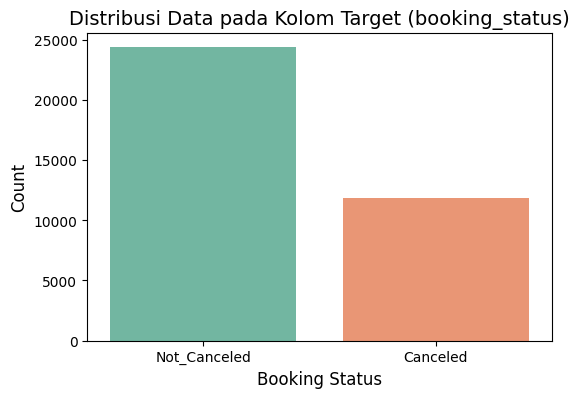

In [39]:
# Distribusi data pada kolom target
plt.figure(figsize=(6, 4))
sns.countplot(x='booking_status', data=df, palette='Set2')

plt.title('Distribusi Data pada Kolom Target (booking_status)', fontsize=14)
plt.xlabel('Booking Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

Sebagian besar pemesanan **tidak dibatalkan** (Not_Canceled), dengan jumlah jauh lebih banyak dibandingkan dengan pemesanan yang **dibatalkan** (Canceled). Ini menunjukkan bahwa lebih banyak pemesanan yang berhasil diselesaikan daripada yang dibatalkan.

# Preprocessing

In [40]:
# drop kolom Booking_ID
df.drop('Booking_ID', axis=1, inplace=True)

In [41]:
# Imputasi missing value
# type_of_meal_plan
df['type_of_meal_plan'] = df['type_of_meal_plan'].fillna(df['type_of_meal_plan'].mode()[0])

# avg_price_per_room
df['avg_price_per_room'] = df['avg_price_per_room'].fillna(df['avg_price_per_room'].median())

# required_car_parking_space
df['required_car_parking_space'] = df['required_car_parking_space'].fillna(0)

In [42]:
# cek fill na dataset
df.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


In [43]:
# ubah kolom required_car_parking_space ke int
df['required_car_parking_space'] = df['required_car_parking_space'].astype(int)

In [44]:
# One hot Encoding
one_hot_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

dummy_frames = []
for col in one_hot_cols:
    dummies = pd.get_dummies(df[col], prefix=col)
    dummy_frames.append(dummies)

dummies_all = pd.concat(dummy_frames, axis=1)
df.drop(columns=one_hot_cols, inplace=True)
df = pd.concat([df, dummies_all], axis=1)

df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

df['arrival_year'] = df['arrival_year'].map({2017: 0, 2018: 1})

df['arrival_year'] = df['arrival_year'].fillna(-1)

In [45]:
# handle outlier
numerical_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                  'lead_time', 'avg_price_per_room', 'no_of_previous_cancellations',
                  'no_of_previous_bookings_not_canceled', 'no_of_special_requests', 'arrival_year']

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[numerical_cols] = df[numerical_cols].apply(lambda x: np.where(x < lower_bound[x.name], lower_bound[x.name], x))
df[numerical_cols] = df[numerical_cols].apply(lambda x: np.where(x > upper_bound[x.name], upper_bound[x.name], x))

In [46]:
# scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [47]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

# Splitting Data

In [48]:
from sklearn.model_selection import train_test_split

X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [49]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

# Create Model

## Random Forest

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning untuk model Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_weighted')

# Fit model ke data pelatihan
grid_search.fit(X_train, y_train)

# Mengambil parameter terbaik
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

# Prediksi
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

# Evaluasi Model
print("Random Forest with GridSearchCV - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))

print("\nRandom Forest with GridSearchCV - Classification Report:")
print(classification_report(y_test, y_pred_tuned))

Best Parameters from Grid Search:
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest with GridSearchCV - Confusion Matrix:
[[4576  263]
 [ 457 1959]]

Random Forest with GridSearchCV - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4839
           1       0.88      0.81      0.84      2416

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



Berdasarkan hasil yang Anda berikan dari **Random Forest** dengan **GridSearchCV**, berikut adalah evaluasi model secara keseluruhan:

---

### **Evaluasi Model: Random Forest dengan GridSearchCV**

#### **Parameter Terbaik dari Grid Search:**
- **max_depth:** 30
- **min_samples_leaf:** 1
- **min_samples_split:** 2
- **n_estimators:** 300

#### **Confusion Matrix:**
```
[[4576  263]
 [ 457 1959]]
```
- **True Negatives (TN):** 4576 - Jumlah prediksi yang benar untuk kelas 0.
- **False Positives (FP):** 263 - Jumlah prediksi yang salah untuk kelas 0 (seharusnya kelas 0, tetapi diprediksi kelas 1).
- **False Negatives (FN):** 457 - Jumlah prediksi yang salah untuk kelas 1 (seharusnya kelas 1, tetapi diprediksi kelas 0).
- **True Positives (TP):** 1959 - Jumlah prediksi yang benar untuk kelas 1.

#### **Laporan Klasifikasi:**

| Kelas | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.91      | 0.95   | 0.93     | 4839    |
| 1     | 0.88      | 0.81   | 0.84     | 2416    |

- **Precision untuk kelas 0:** 0.91 - Artinya, 91% dari prediksi yang dibuat untuk kelas 0 adalah benar.
- **Precision untuk kelas 1:** 0.88 - Artinya, 88% dari prediksi yang dibuat untuk kelas 1 adalah benar.
- **Recall untuk kelas 0:** 0.95 - Artinya, 95% dari kasus sebenarnya kelas 0 dapat terdeteksi dengan benar oleh model.
- **Recall untuk kelas 1:** 0.81 - Artinya, 81% dari kasus sebenarnya kelas 1 dapat terdeteksi dengan benar oleh model.
- **F1-Score untuk kelas 0:** 0.93 - Mengindikasikan keseimbangan yang sangat baik antara precision dan recall untuk kelas 0.
- **F1-Score untuk kelas 1:** 0.84 - Menunjukkan keseimbangan yang baik antara precision dan recall untuk kelas 1, meskipun sedikit lebih rendah dibandingkan dengan kelas 0.

#### **Akurasi:**
- **Akurasi:** 0.90 (90%) - Ini menunjukkan bahwa model secara keseluruhan berhasil mengklasifikasikan 90% data dengan benar.

#### **Rata-Rata Makro:**
- **Precision Makro:** 0.90 - Rata-rata precision untuk kedua kelas, memberikan gambaran umum tentang keakuratan model.
- **Recall Makro:** 0.88 - Rata-rata recall untuk kedua kelas, menunjukkan kemampuan model untuk mendeteksi semua kelas.
- **F1-Score Makro:** 0.89 - Rata-rata F1-Score untuk kedua kelas, memberikan gambaran tentang keseimbangan precision dan recall.

#### **Rata-Rata Tertimbang:**
- **Precision Tertimbang:** 0.90 - Precision rata-rata yang mempertimbangkan distribusi kelas.
- **Recall Tertimbang:** 0.90 - Recall rata-rata yang mempertimbangkan distribusi kelas.
- **F1-Score Tertimbang:** 0.90 - F1-Score rata-rata yang mempertimbangkan distribusi kelas, menunjukkan keseimbangan yang sangat baik antara precision dan recall.

---

### **Kesimpulan:**

1. **Akurasi Tinggi:** Model ini berhasil mencapai **akurasi** sebesar 90%, yang menunjukkan bahwa model memiliki performa yang sangat baik secara keseluruhan.
   
2. **Deteksi Kelas 0 (Negatif):** Precision dan recall untuk kelas 0 sangat tinggi, dengan **F1-score 0.93**, menunjukkan bahwa model sangat baik dalam memprediksi kelas 0.
   
3. **Deteksi Kelas 1 (Positif):** Meskipun precision dan recall untuk kelas 1 sedikit lebih rendah dibandingkan dengan kelas 0, hasil **F1-score 0.84** masih menunjukkan performa yang cukup baik untuk kelas 1.

4. **Model yang Seimbang:** Berdasarkan **rata-rata makro** dan **rata-rata tertimbang** yang hampir identik.

Secara keseluruhan, model **Random Forest** ini sudah menunjukkan hasil yang sangat baik dalam klasifikasi dengan **akurasi tinggi** dan performa yang cukup baik di kedua kelas.

## XGBoost

In [52]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialisasi model XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# GridSearchCV untuk pencarian hyperparameter
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='f1_weighted')

# Train
grid_search_xgb.fit(X_train, y_train)

# Parameter terbaik XGBoost
print("Best Parameters for XGBoost:")
print(grid_search_xgb.best_params_)

# Prediksi Best Model
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)

# Evaluasi Model untuk XGBoost
print("XGBoost with GridSearchCV - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nXGBoost with GridSearchCV - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Best Parameters for XGBoost:
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'subsample': 1.0}
XGBoost with GridSearchCV - Confusion Matrix:
[[4563  276]
 [ 456 1960]]

XGBoost with GridSearchCV - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4839
           1       0.88      0.81      0.84      2416

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.88      7255
weighted avg       0.90      0.90      0.90      7255



Berdasarkan hasil yang Anda berikan untuk **XGBoost** dengan **GridSearchCV**, berikut adalah evaluasi model secara keseluruhan:

---

### **Evaluasi Model: XGBoost dengan GridSearchCV**

#### **Parameter Terbaik dari Grid Search:**
- **colsample_bytree:** 0.7
- **learning_rate:** 0.1
- **max_depth:** 10
- **n_estimators:** 300
- **subsample:** 1.0

#### **Confusion Matrix:**
```
[[4563  276]
 [ 456 1960]]
```
- **True Negatives (TN):** 4563 - Jumlah prediksi yang benar untuk kelas 0.
- **False Positives (FP):** 276 - Jumlah prediksi yang salah untuk kelas 0 (seharusnya kelas 0, tetapi diprediksi kelas 1).
- **False Negatives (FN):** 456 - Jumlah prediksi yang salah untuk kelas 1 (seharusnya kelas 1, tetapi diprediksi kelas 0).
- **True Positives (TP):** 1960 - Jumlah prediksi yang benar untuk kelas 1.

#### **Laporan Klasifikasi:**

| Kelas | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.91      | 0.94   | 0.93     | 4839    |
| 1     | 0.88      | 0.81   | 0.84     | 2416    |

- **Precision untuk kelas 0:** 0.91 - Artinya, 91% dari prediksi yang dibuat untuk kelas 0 adalah benar.
- **Precision untuk kelas 1:** 0.88 - Artinya, 88% dari prediksi yang dibuat untuk kelas 1 adalah benar.
- **Recall untuk kelas 0:** 0.94 - Artinya, 94% dari kasus sebenarnya kelas 0 dapat terdeteksi dengan benar oleh model.
- **Recall untuk kelas 1:** 0.81 - Artinya, 81% dari kasus sebenarnya kelas 1 dapat terdeteksi dengan benar oleh model.
- **F1-Score untuk kelas 0:** 0.93 - Mengindikasikan keseimbangan yang sangat baik antara precision dan recall untuk kelas 0.
- **F1-Score untuk kelas 1:** 0.84 - Menunjukkan keseimbangan yang baik antara precision dan recall untuk kelas 1, meskipun sedikit lebih rendah dibandingkan dengan kelas 0.

#### **Akurasi:**
- **Akurasi:** 0.90 (90%) - Ini menunjukkan bahwa model secara keseluruhan berhasil mengklasifikasikan 90% data dengan benar.

#### **Rata-Rata Makro:**
- **Precision Makro:** 0.89 - Rata-rata precision untuk kedua kelas, memberikan gambaran umum tentang keakuratan model.
- **Recall Makro:** 0.88 - Rata-rata recall untuk kedua kelas, menunjukkan kemampuan model untuk mendeteksi semua kelas.
- **F1-Score Makro:** 0.88 - Rata-rata F1-Score untuk kedua kelas, memberikan gambaran tentang keseimbangan precision dan recall.

#### **Rata-Rata Tertimbang:**
- **Precision Tertimbang:** 0.90 - Precision rata-rata yang mempertimbangkan distribusi kelas.
- **Recall Tertimbang:** 0.90 - Recall rata-rata yang mempertimbangkan distribusi kelas.
- **F1-Score Tertimbang:** 0.90 - F1-Score rata-rata yang mempertimbangkan distribusi kelas, menunjukkan keseimbangan yang sangat baik antara precision dan recall.

---

### **Kesimpulan:**

1. **Akurasi Tinggi:** Model ini berhasil mencapai **akurasi** sebesar 90%, yang menunjukkan bahwa model memiliki performa yang sangat baik secara keseluruhan.
   
2. **Deteksi Kelas 0 (Negatif):** Precision dan recall untuk kelas 0 sangat tinggi, dengan **F1-score 0.93**, menunjukkan bahwa model sangat baik dalam memprediksi kelas 0.
   
3. **Deteksi Kelas 1 (Positif):** Meskipun precision dan recall untuk kelas 1 sedikit lebih rendah dibandingkan dengan kelas 0, hasil **F1-score 0.84** masih menunjukkan performa yang cukup baik untuk kelas 1.

4. **Model yang Seimbang:** Berdasarkan **rata-rata makro** dan **rata-rata tertimbang** yang hampir identik, model ini menunjukkan keseimbangan yang sangat baik dalam memprediksi kedua kelas.

Secara keseluruhan, model **XGBoost** ini sudah menunjukkan hasil yang sangat baik dalam klasifikasi dengan **akurasi tinggi** dan performa yang sangat baik di kedua kelas.

# Evaluasi Pemilihan Model

**XGBoost** sebagai model pilihan karena:

1. **Kecepatan dan Efisiensi:** XGBoost lebih cepat dan efisien, terutama pada data besar.
2. **Mengurangi Overfitting:** XGBoost memiliki regulasi yang lebih baik, mengurangi risiko overfitting.
3. **Penanganan Ketidakseimbangan Kelas:** Lebih baik dalam menangani kelas yang tidak seimbang.
4. **Performanya lebih baik di Kelas Positif:** XGBoost sedikit lebih unggul dalam **precision** dan **recall** untuk kelas positif (1).
5. **Fleksibilitas:** XGBoost memiliki lebih banyak parameter untuk tuning, memungkinkan performa lebih optimal.

Secara keseluruhan, **XGBoost** memberikan **kecepatan, stabilitas**, dan **fleksibilitas** yang lebih baik dibandingkan **Random Forest**, membuatnya lebih cocok untuk prediksi yang lebih andal.

# Tranform ke Pickle

In [53]:
import joblib
best_model = grid_search_xgb.best_estimator_
joblib.dump(best_model, 'model_xg1.pkl', compress=3)

['model_xg1.pkl']